### __2weeks__ 
201804225 이다진 | subject: 데이터분석과 기계학습 

간단한 분류 알고리즘 (feat. 붓꽃 데이터 iris)
1. 2.2 파이썬 으로 퍼셉트론 학습 알고리즘 - 퍼셉트론 알고리즘 훈련 p. 59, 65, 66(결정경계)
2. 2.3 적응형 선형 뉴런과 학습의 수렴 
- 아달린 알고리즘 p.72(AadlineGD), 74(에포크 횟수 대비 비용 그래프), 76-77(표준화 후 아달린 모델 훈련)
- 확률적 경사 하강법을 이용한 아달린 알고리즘(AadlineSGD) p.79-81, p.82 fit 메서드 통한 SGD훈련 및 그래프   "**과제**"


*GD = 경사 하강법 (gradient descent)
_______________________________________________________________________________________________________________________________________

In [178]:
# p. 59
import numpy as np

In [136]:
class Perceptron(object):
    '''
    params
    ------
    eta : float 학습률
    n_iter : int 훈련 데이터 셋 반복 횟수
    random_state : int 
    
    Properties
    ----
    w_ :1d-array 가중치 저장 
    cost_ : list 에포크 \마다 누적된 분류 오류 
    '''
    
    def __init__(self, eta= .01, n_iter= 50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        '''
        훈련 데이터 학습 
        
        Param:
        X: array-Like, shape = [n_samples, n_features]
        y: array-Like, shape = n_samples]
        
        return 
        self : object
        '''
        
        #초기에 랜덤하게 w를 세팅
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
        

In [137]:
#p. 63
import os 
import pandas as pd 
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [127]:
import matplotlib.pyplot as plt
import numpy as np

In [138]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [139]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [140]:
X = df.iloc[0:100, [0,2]].values

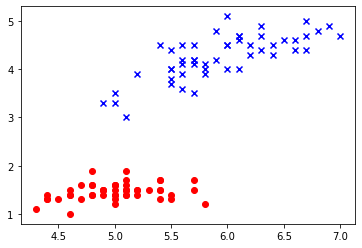

In [141]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.show()

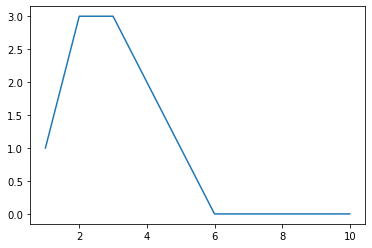

In [142]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.show()

In [143]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

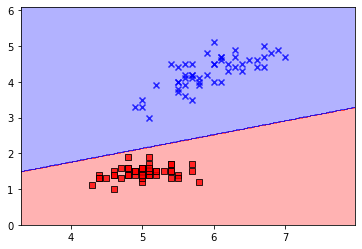

In [144]:
plot_decision_regions(X, y, classifier=ppn)

In [145]:
#p 72

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

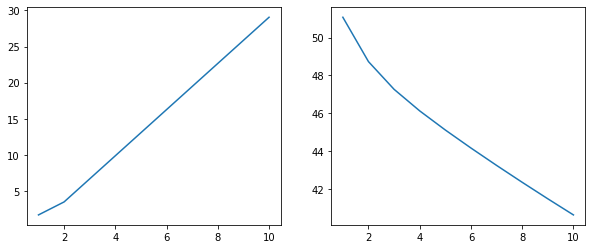

In [147]:
#eta 구하기
#p.74

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_)

plt.show()

In [150]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:,1] - X[:, 1].mean()) / X[:, 1].std()

In [159]:
#X

In [153]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

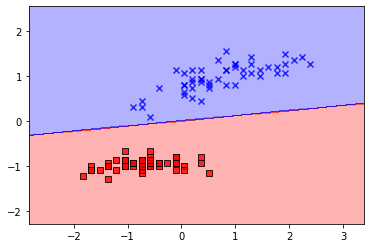

In [156]:
plot_decision_regions(X_std, y, classifier=ada)

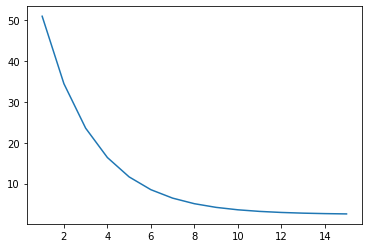

In [158]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_)

## # AdslineSGD 

__과제부분__

In [174]:
# p.79 - AdslineSGD
class AdalineSGD(object):
    '''
    params
    ------
    eta : float 학습률
    n_iter : int 훈련 데이터 셋 반복 횟수
    shuffle : bool (daafault : True) - 에포크 마다 훈련 데이터 섞기
    random_state : int 
    
    Properties
    ----
    w_ :1d-array 가중치 저장 
    cost_ : list 에포크 \마다 누적된 분류 오류 
    '''
    def __init__(self, eta = .01, n_iter=10,
                shuffle = True, random_state=None):
        self.eta = eta 
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost =[]
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self 
    
    def partial_fit(self, X, y) :
        if not self.w_initialized:
            self._initalize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
        
    # np.random - permutation 을 통해 0`100'까지 중복되지 않은 랜덤 숫자 시퀸스 생성 
    # 특성 행렬과 클래스 레이블 벡터 섞는 용도 
    def _shuffle(self, X, y):                    
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01,  size = 1+m )
        self.w_initialized = True 
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

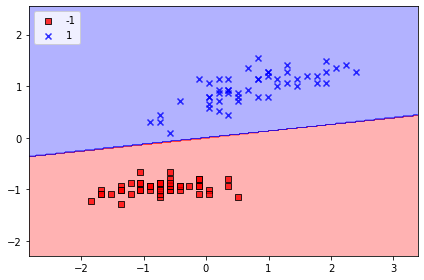

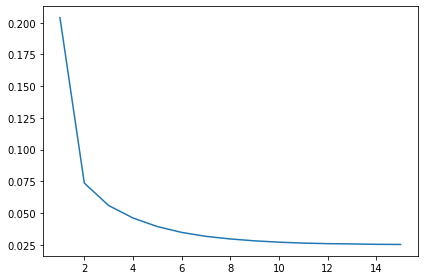

In [177]:
#p. 82
ada_sgd = AdalineSGD(n_iter=15, eta=.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier= ada_sgd)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#marker = 'o' <- 선 위에 점 마크 
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_)
plt.tight_layout()

plt.show()

In [176]:
ada_sgd.partial_fit(X_std[0, :], y[0])